<a href="https://colab.research.google.com/github/silverstar0727/1day-1commit-challenge/blob/master/machine_learning_ch6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pipeline

In [0]:
import pandas as pd
df = pd.read_csv('https://archive.ics.uci.edu/ml/'
'machine-learning-databases'
'/breast-cancer-wisconsin/wdbc.data', header = None)


In [0]:
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [0]:
from sklearn.preprocessing import LabelEncoder

X = df.loc[:, 2:].values
y = df.loc[:, 1.].values
le = LabelEncoder()
y = le.fit_transform(y)
le.classes_


array(['B', 'M'], dtype=object)

In [0]:
le.transform(['M','B'])

array([1, 0])

In [0]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y, random_state = 1)


In [0]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

pipe_lr = make_pipeline(StandardScaler(), PCA(n_components=2), LogisticRegression(solver = 'liblinear',random_state = 1))
pipe_lr.fit(X_train, y_train)
y_pred = pipe_lr.predict(X_test)
pipe_lr.score(X_test, y_test)

0.956140350877193

# K-겹 교차검증

1. holdout cross validation

다양한 모델중 선택하기 위해서 데이터를
훈련, 검증, 테스트로 나눈다.
검증데이터를 통해 모델을 정하고 테스트를 통해 실질적인 prediction가 이루어진다.

2. k-겹 교차검증

데이터중 k개를 중복없는 추출을 하여 k-1개로는 모델을 훈련하고 나머지 한개는 모델을 평가한다.

일반적으로 10겹이 좋다고 알려져 있다.

3. 계층적 k-겹 교차검증(stratified k-fold cross validation)




In [0]:
# stratified k-fold cross validation
import numpy as np
from sklearn.model_selection import StratifiedKFold

#사이킷런 0.24부터는 randomstate대신 shuffle을 써야함
kfold = StratifiedKFold(n_splits = 10, shuffle = True).split(X_train, y_train)

scores = []

for k, (train,test) in enumerate(kfold):
  pipe_lr.fit(X_train[train], y_train[train])
  score = pipe_lr.score(X_train[test], y_train[test])
  scores.append(score)
  print(np.bincount(y_train[train]), score)

print(np.mean(scores), np.std(scores))

[256 153] 0.8913043478260869
[256 153] 0.9782608695652174
[256 153] 0.9565217391304348
[256 153] 0.9565217391304348
[256 153] 0.9347826086956522
[257 153] 0.9777777777777777
[257 153] 0.9555555555555556
[257 153] 0.9555555555555556
[257 153] 0.9111111111111111
[257 153] 0.9777777777777777
0.9495169082125605 0.02770458746715084


In [0]:
from sklearn.model_selection import cross_val_score

#n_jobs는 cpu를 최대로 사용
#측정지표는 R-square
scores = cross_val_score(estimator = pipe_lr, X = X_train, y = y_train, cv = 10, n_jobs = 1)
print(scores)
print(np.mean(scores), np.std(scores))

[0.93478261 0.93478261 0.95652174 0.95652174 0.93478261 0.95555556
 0.97777778 0.93333333 0.95555556 0.95555556]
0.9495169082125603 0.013854294239660376


# 검증곡선을 이용한 적합도 조사

No handles with labels found to put in legend.


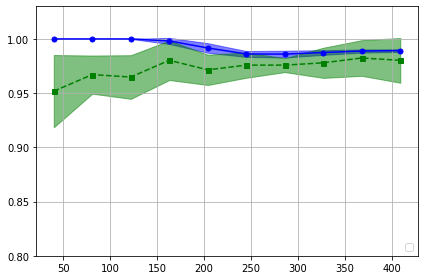

In [0]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

pipe_lr = make_pipeline(StandardScaler(), LogisticRegression(solver = 'liblinear', penalty = 'l2', random_state = 1))

train_sizes, train_scores, test_scores = learning_curve(estimator = pipe_lr, X = X_train, y = y_train, 
                                                        train_sizes = np.linspace(0.1, 1.0, 10), cv = 10, n_jobs = 1)

train_mean = np.mean(train_scores, axis = 1)
train_std = np.std(train_scores, axis = 1)
test_mean = np.mean(test_scores, axis = 1)
test_std = np.std(test_scores, axis = 1)

plt.plot(train_sizes, train_mean, color = 'blue', marker = 'o', markersize = 5)
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha = 0.5, color = 'blue')
plt.plot(train_sizes, test_mean, color = 'green', linestyle = '--', marker = 's', markersize = 5)
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha = 0.5, color = 'green')

plt.grid()
plt.legend(loc = 'lower right')
plt.ylim([0.8, 1.03])
plt.tight_layout()
plt.show()

No handles with labels found to put in legend.


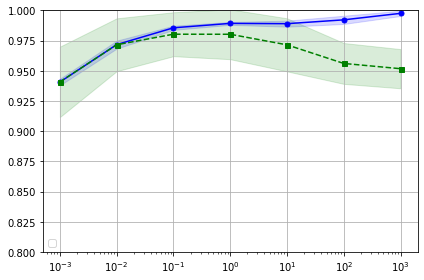

In [0]:
from sklearn.model_selection import validation_curve

param_range = []
for i in range( -3, 4):
  param_range.append(10 ** i)

train_scores, test_scores = validation_curve(estimator = pipe_lr, X = X_train, y = y_train,
                                             param_name = 'logisticregression__C', param_range = param_range, cv = 10)

train_mean = np.mean(train_scores, axis = 1)
train_std = np.std(train_scores, axis = 1)
test_mean = np.mean(test_scores, axis = 1)
test_std = np.std(test_scores, axis = 1)

plt.plot(param_range, train_mean, color = 'blue', marker = 'o', markersize = 5)
plt.fill_between(param_range, train_mean + train_std, train_mean - train_std, alpha = 0.15, color = 'blue')
plt.plot(param_range, test_mean, color = 'green', linestyle = '--', marker = 's', markersize = 5)
plt.fill_between(param_range, test_mean + test_std, test_mean - test_std, alpha = 0.15, color = 'green')

plt.grid()
plt.xscale('log')
plt.legend(loc = 'lower left')
plt.ylim([0.8, 1.0])
plt.tight_layout()
plt.show()

# grid search를 이용한 hyperparameter tuning

그리드 서치는 비용이 많이듦으로 사이킷런의 randomized search도 이용해보도록 하자.

http://scikit_learn.org/stable/modules/grid_search.htm#randomized-parameter-optimization)

In [0]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

pipe_svc = make_pipeline(StandardScaler(), SVC(random_state = 1))
param_range = []
for i in range(-4,5):
  param_range.append(10 ** i)

param_grid = [{'svc__C': param_range, 'svc__kernel':['linear']},
              {'svc__C': param_range, 'svc__gamma': param_range, 'svc__kernel': ['rbf']}]

gs = GridSearchCV(estimator = pipe_svc, param_grid = param_grid, scoring = 'accuracy',cv = 10, n_jobs = -1)
gs = gs.fit(X_train, y_train)
print(gs.best_score_)
print(gs.best_params_)

0.9846859903381642
{'svc__C': 100, 'svc__gamma': 0.001, 'svc__kernel': 'rbf'}


In [0]:
clf = gs.best_estimator_
clf.fit(X_train, y_train)
print(clf.score(X_test, y_test))

0.9736842105263158


# nested cross validation

바깥쪽 루프와 안쪽루프를 만들어서, 안쪽에서 훈련된 모델을 바깥쪽 테스트를 통해 모델을 선택한다.

In [0]:
# svm모델의 중첩 교차 검증 성능
gs = GridSearchCV(estimator = pipe_svc, param_grid = param_grid, scoring = 'accuracy', cv = 2) # cv는 반복수

scores = cross_val_score(gs, X_train, y_train, scoring = 'accuracy', cv = 5)
print(np.mean(scores), np.std(scores))



0.9736263736263737 0.014906219743132467


In [0]:
# 결정트리의 성능
from sklearn.tree import DecisionTreeClassifier
gs = GridSearchCV(estimator = DecisionTreeClassifier(random_state = 0),
                  param_grid = [{'max_depth':[1,2,3,4,5,6,7, None]}], scoring = 'accuracy', cv = 2)
scores = cross_val_score(gs, X_train, y_train, scoring = 'accuracy', cv =5)
print(np.mean(scores), np.std(scores))

0.9340659340659341 0.015540808377726326


# 각종 성능평가지표

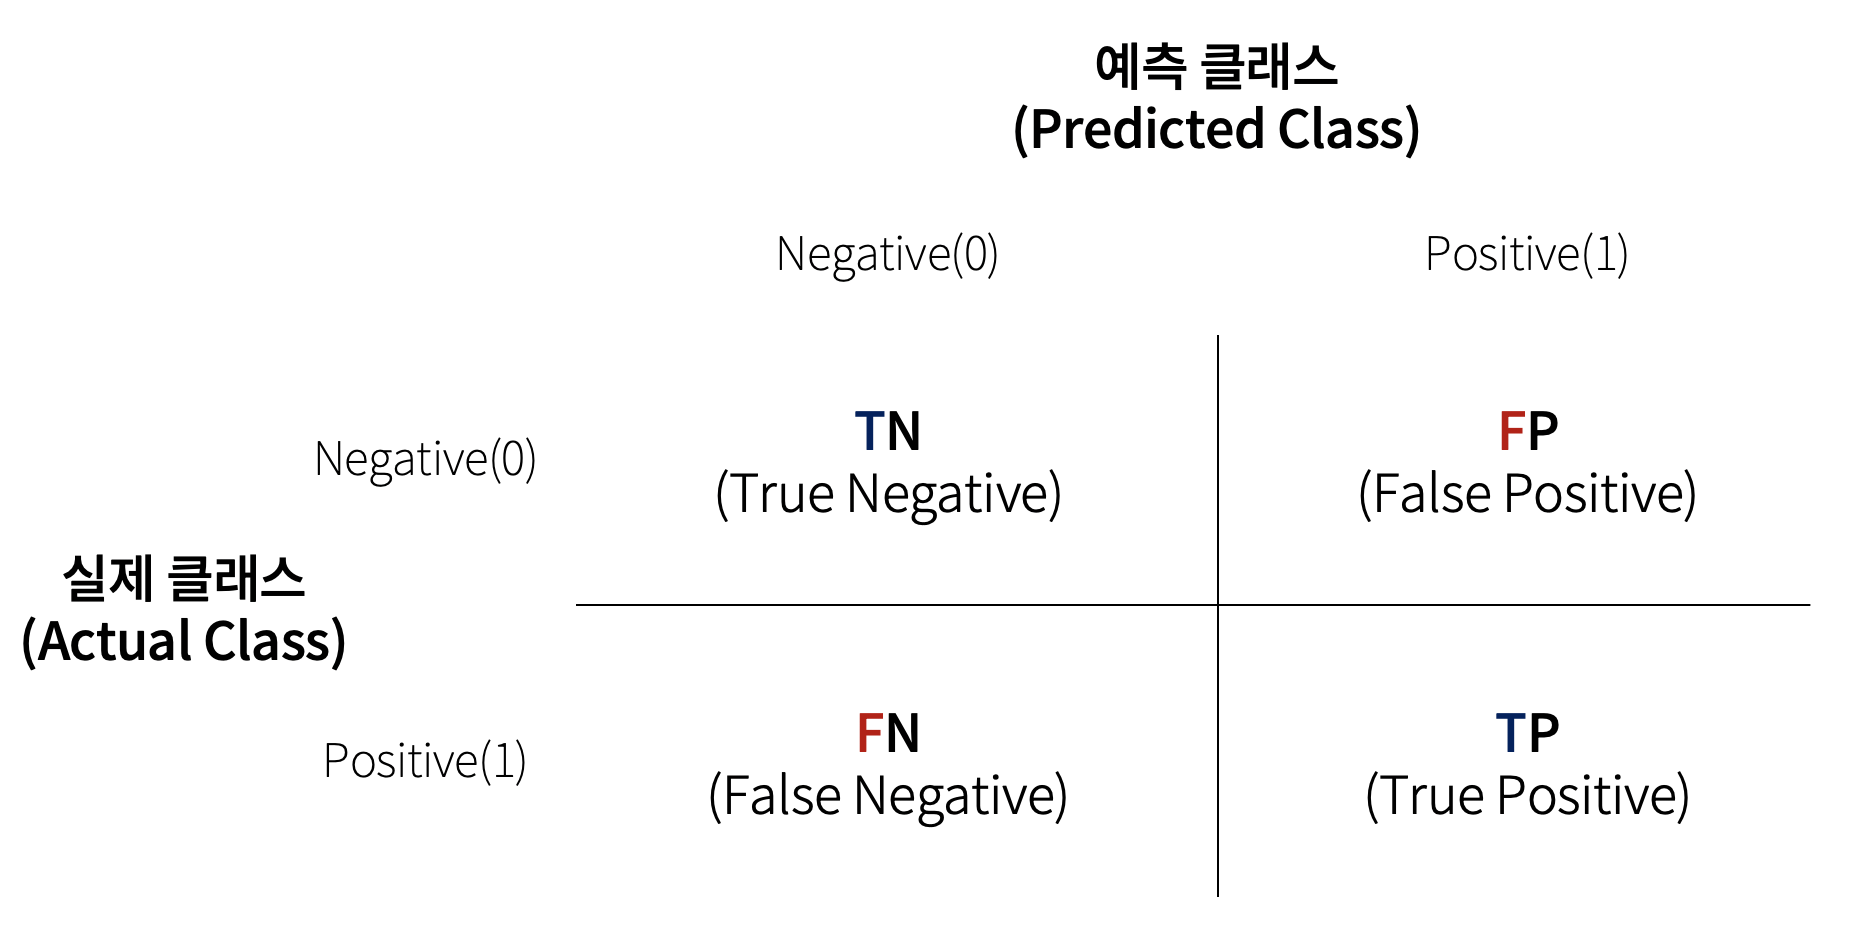

In [0]:
from sklearn.metrics import confusion_matrix

pipe_svc.fit(X_train, y_train)
y_pred = pipe_svc.predict(X_test)
confmat = confusion_matrix(y_true = y_test, y_pred = y_pred)
print(confmat)

[[71  1]
 [ 2 40]]


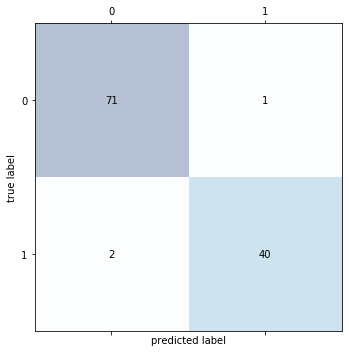

In [0]:
fig,ax = plt.subplots(figsize = (5,5))
ax.matshow(confmat, cmap = plt.cm.Blues, alpha = 0.3)

for i in range(confmat.shape[0]):
  for j in range(confmat.shape[1]):
    ax.text(x = j, y = i, s = confmat[i,j], va = 'center', ha = 'center')

plt.xlabel('predicted label')
plt.ylabel('true label')
plt.tight_layout()
plt.show()

# 분류모델의 정밀도 구하기

In [0]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score, f1_score

print('정밀도')
print(precision_score(y_true = y_test, y_pred = y_pred))
print('재현율')
print(recall_score(y_true = y_test, y_pred = y_pred))
print('F1')
print(f1_score(y_true = y_test, y_pred = y_pred))

정밀도
0.975609756097561
재현율
0.9523809523809523
F1
0.963855421686747


In [0]:
# f1을 측정지표로해서 자기만의 클래스 만들기
from sklearn.metrics import make_scorer, f1_score
scorer = make_scorer(f1_score, pos_label = 0)
c_gamma_range = [0.01, 0.1, 1.0, 10.0]
param_grid = [{'svc__C': c_gamma_range, 'svc__kernel': ['linear']},
              {'svc__C': c_gamma_range, 'svc__kernel': ['rbf']}]
              
gs = GridSearchCV(estimator = pipe_svc, param_grid = param_grid, scoring = scorer, cv =10)
gs = gs.fit(X_train, y_train)
print(gs.best_score_)
print(gs.best_params_)

0.9895936509889569
{'svc__C': 10.0, 'svc__kernel': 'rbf'}


# ROC 곡선그리기
receiver operating characteristic그래프는 임계값을 바꾸어가며 계산된 FPR과 TPR점수를 기반으로 분류모델을 선택한다.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


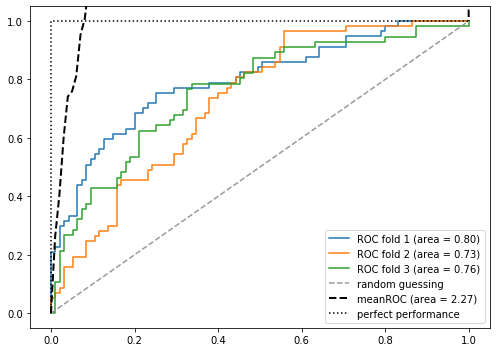

In [0]:
from sklearn.metrics import roc_curve, auc
from scipy import interp

pipe_lr = make_pipeline(StandardScaler(), PCA(n_components = 2), 
                        LogisticRegression(solver = 'liblinear', penalty = 'l2', random_state = 1, C =100))

X_train2 = X_train[:, [4,14]]
cv = list(StratifiedKFold(n_splits = 3, shuffle = True).split(X_train, y_train))

fig = plt.figure(figsize = (7,5))

mean_tpr = 0
mean_fpr = np.linspace(0,1,100)
all_tpr = []

for i, (train, test) in enumerate(cv):
  probas = pipe_lr.fit(X_train2[train], y_train[train]).predict_proba(X_train2[test])
  fpr, tpr, thresholds = roc_curve(y_train[test], probas[:,1], pos_label = 1)

  mean_tpr += interp(mean_fpr, fpr, tpr)
  mean_tpr[0] = 0
  roc_auc = auc(fpr, tpr)
  plt.plot(fpr, tpr, label = 'ROC fold %d (area = %0.2f)' %(i + 1, roc_auc))

plt.plot([0,1],[0,1], linestyle = '--', color = (0.6,0.6,0.6), label = 'random guessing')
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, 'k--', label = 'meanROC (area = %0.2f)' % mean_auc, lw = 2)
plt.plot([0,0,1],[0,1,1], linestyle = ':', color = 'black',label = 'perfect performance')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])
plt.legend(loc = 'lower right')
plt.tight_layout()
plt.show()

#### 다중분류 성능지표

avarage 매개변수로 평균 계산 방식을 지정할 수 있음

precision_score나 make_scorer함수가 이에 해당

In [0]:
pre_scorer = make_scorer(score_func = precision_score, pos_label = 1, greater_is_better= True, average = 'micro')

## 불균형한 클래스 다루기

In [0]:
# 데이터생성
X_imb = np.vstack((X[y == 0], X[y == 1][:40]))
y_imb = np.hstack((y[y == 0], y[y == 1][:40]))


In [0]:
# 기존의 방법대로의 예측시 정확도는 90프로
y_pred = np.zeros(y_imb.shape[0])
np.mean(y_pred == y_imb) * 100


89.92443324937027

In [0]:
from sklearn.utils import resample

print('샘플링 하기 전 클래스 1의 샘플개수:', X_imb[y_imb == 1].shape[0])

X_upsampled, y_upsampled = resample(X_imb[y_imb == 1], y_imb[y_imb == 1], replace = True, n_samples = X_imb[y_imb == 0].shape[0], random_state = 123)
print('샘플링 후 클래스 1의 샘플개수:',X_upsampled.shape[0])

샘플링 하기 전 클래스 1의 샘플개수: 40
샘플링 후 클래스 1의 샘플개수: 357
